In [ ]:
!wget -nc https://lazyprogrammer.me/course_files/airline_passengers.csv

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [4]:
df = pd.read_csv('airline_passengers.csv',index_col='Month',parse_dates=True)

In [5]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


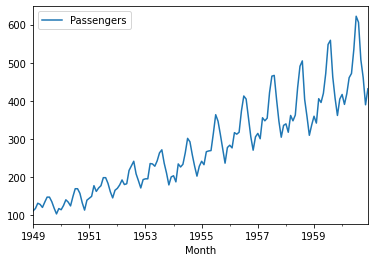

In [6]:
df.plot();

In [7]:
df['1stdiff'] = df['Passengers'].diff()

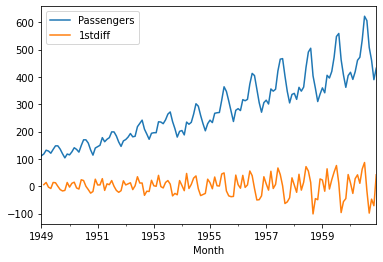

In [9]:
df.plot();

In [11]:
df['LogPassengers'] = np.log(df['Passengers'])

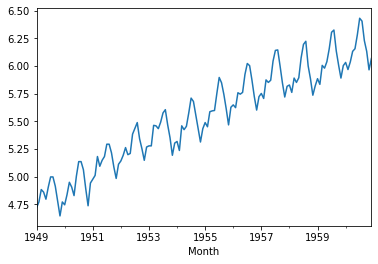

In [13]:
df['LogPassengers'].plot();

In [14]:
from statsmodels.tsa.arima_model import ARIMA

In [15]:
df.index.freq = 'MS'

Ntest=12
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]


In [16]:
arima = ARIMA(train['Passengers'],order=(1,0,0))

/Users/vadimsmirnov/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [17]:
arima_result = arima.fit()

In [18]:
df.loc[:-Ntest,'AR(1)'] = arima_result.predict(start=train.index[0],end=train.index[-1])

<ipython-input-18-cb4ceb523939>:1: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  df.loc[:-Ntest,'AR(1)'] = arima_result.predict(start=train.index[0],end=train.index[-1])


<AxesSubplot:xlabel='Month'>

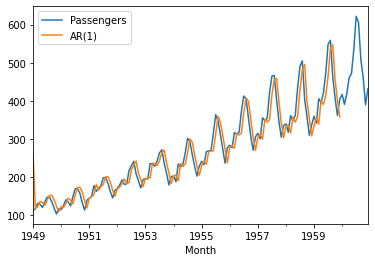

In [23]:
df[['Passengers','AR(1)']].plot()

In [24]:
forecast,stderr,confint = arima_result.forecast(Ntest)
df.loc[-Ntest:,'AR(1)'] = forecast

<ipython-input-24-050ddaa087cf>:2: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  df.loc[-Ntest:,'AR(1)'] = forecast


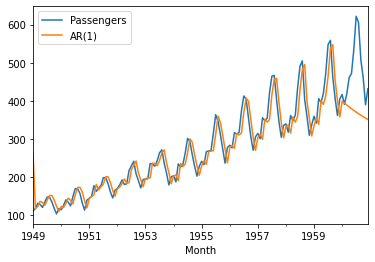

In [25]:
df[['Passengers','AR(1)']].plot();

In [30]:
def plot_fit_and_forecast(result):
    fig,ax = plt.subplots(figsize=(10,5))
    ax.plot(df['Passengers'],label='data')
    
    #plot the curve fitted on train set
    train_pred = result.fittedvalues
    ax.plot(train.index,train_pred,color='green',label='fitted')
    
    #forecast the test set
    forecast,stderr,confint = result.forecast(Ntest)
    ax.plot(test.index,forecast,label='forecast')
    ax.fill_between(test.index,\
                   confint[:,0],confint[:,1],\
                   color='red',alpha=0.3)
    ax.legend()

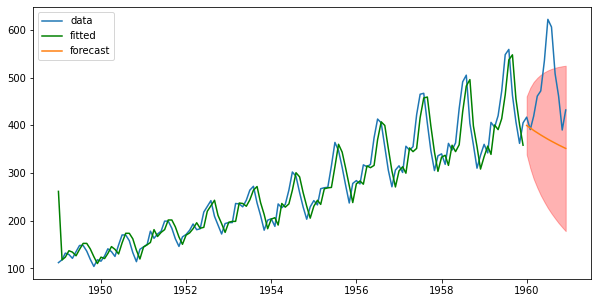

In [31]:
plot_fit_and_forecast(arima_result)

/Users/vadimsmirnov/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


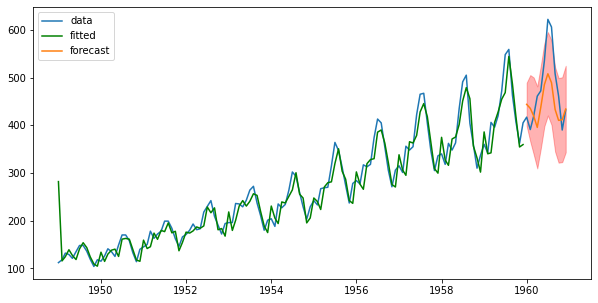

In [32]:
arima = ARIMA(train['Passengers'],order=(10,0,0)) #AR(10)
arima_result = arima.fit()
plot_fit_and_forecast(arima_result)

/Users/vadimsmirnov/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


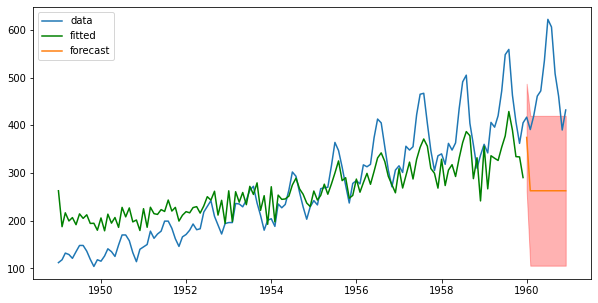

In [33]:
arima = ARIMA(train['Passengers'],order=(0,0,1)) #AR(10)
arima_result = arima.fit()
plot_fit_and_forecast(arima_result)

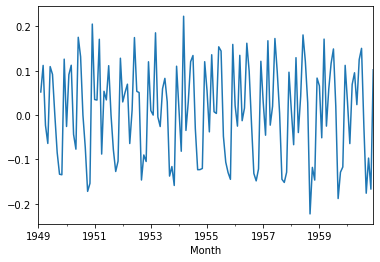

In [34]:
df['Log1stDiff'] = df['LogPassengers'].diff()
df['Log1stDiff'].plot();

/Users/vadimsmirnov/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


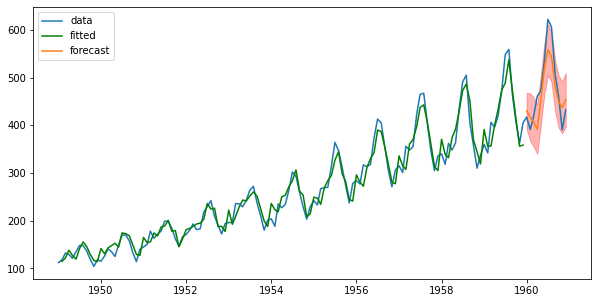

In [38]:
arima = ARIMA(train['Passengers'],order=(8,1,1))
arima_result_811 = arima.fit()

def plot_fit_and_forecast_int(result,d,col='Passengers'):
    fig,ax = plt.subplots(figsize=(10,5))
    ax.plot(df[col],label='data')
    #plot the curve fitted on train set
    train_pred=result.predict(start = train.index[d],end=train.index[-1],\
                              typ = 'levels')
    ax.plot(train.index[d:],train_pred,color='green',label='fitted')
    
    #forecast the test set
    forecast,stderr,confint = result.forecast(Ntest)
    ax.plot(test.index,forecast,label='forecast')
    ax.fill_between(test.index,\
                    confint[:,0],confint[:,1],\
                    color='red',alpha=0.3)
    ax.legend()

plot_fit_and_forecast_int(arima_result_811,1)

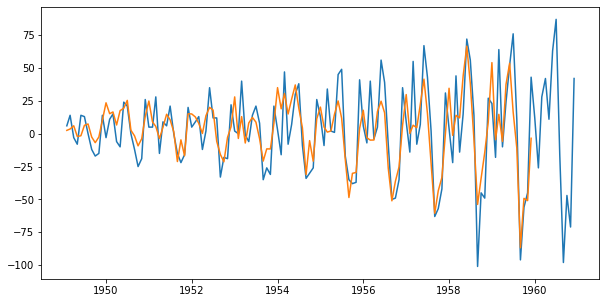

In [40]:
def plot_difference(result,d,col='Passengers'):
    train_pred = result.predict(start=train.index[d],end=train.index[-1])
    #train_pred=result.fittedvalues
    diff=df[col].diff()
    fig,ax = plt.subplots(figsize=(10,5))
    ax.plot(diff,label='true 1st difference')
    ax.plot(train_pred,label='fitted 1st difference');
plot_difference(arima_result_811,1)

/Users/vadimsmirnov/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


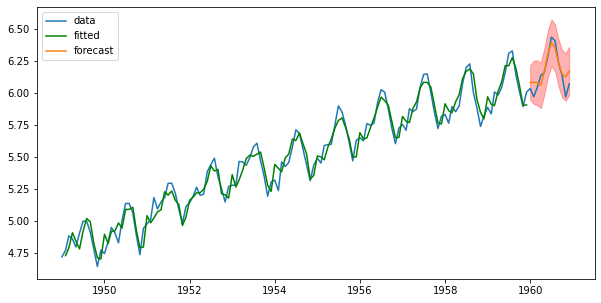

In [42]:
arima = ARIMA(train['LogPassengers'],order=(8,1,1))
arima_result_log811 = arima.fit()
plot_fit_and_forecast_int(arima_result_log811,1, col = 'LogPassengers')

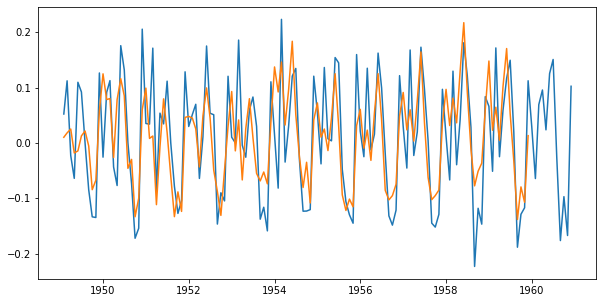

In [43]:
plot_difference(arima_result_log811,1,col='LogPassengers')

/Users/vadimsmirnov/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


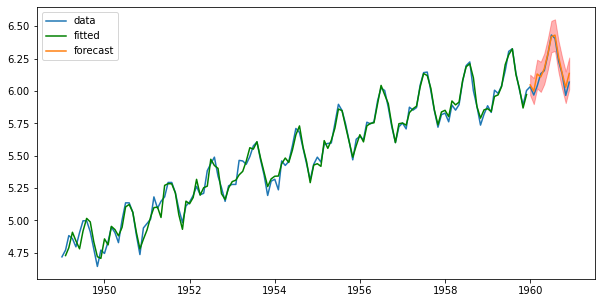

In [44]:
arima = ARIMA(train['LogPassengers'],order=(12,1,0))
arima_result_log1210 = arima.fit()
plot_fit_and_forecast_int(arima_result_log1210,1, col = 'LogPassengers')

In [46]:
def rmse(result,is_logged):
    forecast,stderr,confint = result.forecast(Ntest)
    if is_logged:
        forecast=np.exp(forecast)
    
    t = test['Passengers']
    y = forecast
    return np.sqrt(np.mean((t-y)**2))

In [48]:
print('ARIMA(8,1,1):',rmse(arima_result_811,False))
print('ARIMA(8,1,1) logged:',rmse(arima_result_log811,True))
print('ARIMA(12,1,0) logged:',rmse(arima_result_log1210,True))


ARIMA(8,1,1): 38.550668012872094
ARIMA(8,1,1) logged: 32.22413846403648
ARIMA(12,1,0) logged: 18.61203130340097
